In [123]:
#a regarder sur le cluster 
from pyspark.sql import SparkSession

In [124]:
spark = SparkSession.builder.getOrCreate()

In [3]:
# le but de le faire sur hadoop
path  = "/Users/lydiapc/Desktop/TP1/docker-hadoop/Donnees/objets-trouves-restitution.csv"

In [4]:
df = spark.read.format("csv").option("header", "true").load(path,delimiter=';')

In [5]:
from pyspark.sql import functions as F

In [8]:
mylist = df.groupBy(["Nature d'objets"]).count()

In [9]:
mylist = mylist.orderBy('count', ascending=False)

In [10]:
mylist = mylist.withColumnRenamed("count","countTrouv")

In [11]:
mylist.show()

+--------------------+----------+
|     Nature d'objets|countTrouv|
+--------------------+----------+
|Porte-monnaie, po...|     68638|
|           Sac à dos|     61922|
|  Téléphone portable|     58858|
|Valise, sac sur r...|     51312|
|Manteau, veste, b...|     49050|
|Sac de voyage, sa...|     42730|
|    Clés, porte-clés|     31351|
|Carte d'identité,...|     28121|
|Sac d'enseigne (p...|     23656|
|            Lunettes|     23327|
|          Sac à main|     18403|
|     Carte de crédit|     16950|
|    Lunettes en étui|     16462|
|       Autres divers|     15178|
|Téléphone portabl...|     14077|
|     Bonnet, chapeau|     13281|
|    Foulard, écharpe|     12344|
|  Carte d'abonnement|     11820|
|Pièce d'identité ...|     10519|
|Autre pièce ou pa...|      9222|
+--------------------+----------+
only showing top 20 rows



In [ ]:
#on n'en a pas besoin
mylist.write.format("csv").save("/Users/lydiapc/Desktop/TP1/docker-hadoop/Donnees/objets-trouves")

Visualiser les " dataFrame avec des Bar Empilés

In [12]:
mylist1 = mylist.take(10)

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [14]:
df = pd.DataFrame (mylist1, columns = ['NatureObjet','countTrouv'])

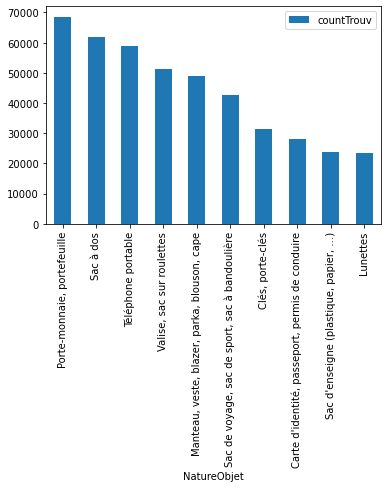

In [15]:
df.plot(x="NatureObjet",y="countTrouv",kind='bar') ; plt.show()

In [16]:
from pyspark.sql.functions import col

In [17]:
df1 = spark.read.format("csv").option("header", "true").load(path,delimiter=';')

In [156]:
df2objetResti = df1.filter(col("Date et heure de restitution").isNotNull())

263657

In [19]:
mylistRest = df2objetResti.groupBy(["Nature d'objets"]).count()

In [20]:
mylistRest = mylistRest.orderBy('count', ascending=False)

In [21]:
mylistRest = mylistRest.withColumnRenamed("count","countRes")

In [22]:
mylistRest.count()

128

In [23]:
mylistRest.show()
#Un graphe pour voir la relation entre les objets restitué et les objets trouvés

+--------------------+--------+
|     Nature d'objets|countRes|
+--------------------+--------+
|Porte-monnaie, po...|   36163|
|Valise, sac sur r...|   32561|
|           Sac à dos|   31606|
|  Téléphone portable|   25227|
|Sac de voyage, sa...|   21807|
|Manteau, veste, b...|   12709|
|          Sac à main|   11026|
|Carte d'identité,...|    8192|
|Téléphone portabl...|    8119|
|Sac d'enseigne (p...|    6916|
|Ordinateur, ordin...|    5765|
|    Clés, porte-clés|    5438|
|Sacoche ventrale,...|    3585|
|       Autres divers|    2981|
|Sacoche pour ordi...|    2752|
|Pièce d'identité ...|    2504|
|     Autre bagagerie|    2483|
|    Lunettes en étui|    2470|
|     Carte de crédit|    2348|
|Tablette tactile ...|    2344|
+--------------------+--------+
only showing top 20 rows



In [ ]:
#OIn peut enlever
mylistRest.write.format("csv").save("/Users/lydiapc/Desktop/TP1/docker-hadoop/Donnees/objets-restitue")

In [24]:
# Jointure entre les deux liste
myListJoined = mylistRest.join(mylist,["Nature d'objets"])

In [25]:
from pyspark.sql import functions as F

In [26]:
from pyspark.sql.types     import *
from pyspark.sql.functions import udf

@udf(returnType = FloatType())
def diff(colonRes,colonTrouv):
    return colonRes*100/colonTrouv

In [27]:
# le pourcentage d'objet restituées 
myListJoined=myListJoined.withColumn("Pourcentage",diff("countRes","countTrouv"))

In [29]:
myListJoined = myListJoined.orderBy('Pourcentage', ascending=False)

In [30]:
myListJoined.show()

+--------------------+--------+----------+-----------+
|     Nature d'objets|countRes|countTrouv|Pourcentage|
+--------------------+--------+----------+-----------+
|              Violon|     130|       166|  78.313255|
|Appareils respira...|     147|       200|       73.5|
|Ordinateur, ordin...|    2330|      3260|   71.47239|
|               Flûte|      38|        54|   70.37037|
|Ordinateur, ordin...|    5765|      8497|   67.84747|
|        Club de golf|      38|        58|   65.51724|
|Valise, sac sur r...|   32561|     51312|   63.45689|
|             Guitare|     462|       734|   62.94278|
|Autres instrument...|     501|       832|  60.216347|
|          Sac à main|   11026|     18403|  59.914143|
|Sacoche pour ordi...|    2752|      4672|   58.90411|
|Attaché-case, ser...|    2054|      3528|  58.219955|
|Sacoche ventrale,...|    3585|      6160|   58.19805|
|Téléphone portabl...|    8119|     14077|   57.67564|
|  Housse de vêtement|     243|       429|  56.643356|
|Porte-mon

In [31]:
# Le fichier qui contient les objets déclarés perdu
path1  = "/Users/lydiapc/Desktop/TP1/docker-hadoop/Donnees/objets-trouves-gares.csv"

In [32]:
df3 = spark.read.format("csv").option("header", "true").load(path1,delimiter=';')

In [33]:
df3.dtypes

[('Date de la déclaration de perte', 'string'),
 ('Gare', 'string'),
 ('Code UIC', 'string'),
 ("Nature d'objets", 'string'),
 ("Type d'objets", 'string'),
 ("Type d'enregistrement", 'string')]

In [34]:
mylistDec = df3.groupBy(["Nature d'objets"]).count()
mylistDec = mylistDec.orderBy('count', ascending=False)
mylistDec = mylistDec.withColumnRenamed("count","countDec")

In [35]:
mylistDec.show()

+--------------------+--------+
|     Nature d'objets|countDec|
+--------------------+--------+
|Porte-monnaie, po...|  136609|
|           Sac à dos|  113851|
|  Téléphone portable|  111741|
|Valise, sac sur r...|   96396|
|Manteau, veste, b...|   88029|
|Sac de voyage, sa...|   75146|
|    Clés, porte-clés|   57990|
|Carte d'identité,...|   49573|
|Sac d'enseigne (p...|   43331|
|       Autres divers|   43010|
|            Lunettes|   42941|
|    Lunettes en étui|   39667|
|          Sac à main|   36754|
|Téléphone portabl...|   35344|
|Ordinateur, ordin...|   30302|
|Autres appareils ...|   26369|
|     Bonnet, chapeau|   26291|
|  Carte d'abonnement|   22859|
|     Autre bagagerie|   20769|
|    Foulard, écharpe|   18782|
+--------------------+--------+
only showing top 20 rows



In [36]:
myListJoinedDecRes = mylistDec.join(mylist,["Nature d'objets"])

In [37]:
myListJoinedDecRes.show()
# Reste a voir comment visualiser tout ça

+--------------------+--------+----------+
|     Nature d'objets|countDec|countTrouv|
+--------------------+--------+----------+
|  Autres jeux/jouets|    1010|       510|
|Autres articles m...|    1933|       932|
|Autres articles d...|   14796|      3785|
|      Jeu de société|     338|       116|
|           Après-ski|      48|        13|
|Disque dur extern...|    7530|      1205|
|          Skateboard|    1641|       642|
|Attaché-case, ser...|    8750|      3528|
|    Pull over, gilet|   13353|      9049|
|           Sac à dos|  113851|     61922|
|       Autres bijoux|     981|       222|
|Porte-monnaie, po...|  136609|     68638|
|     Chemise à rabat|    5215|      1964|
|  Appareils auditifs|    1310|       246|
|Sac d'enseigne (p...|   43331|     23656|
|        Club de golf|     127|        58|
|  Téléphone portable|  111741|     58858|
|Pièce d'identité ...|   17784|     10519|
|  Housse de vêtement|     865|       429|
|Manteau, veste, b...|   88029|     49050|
+----------

#Transform the Date from a string to a timestamp (Date)
#Relation entre les declaration de perte et la régularité mensuelle

In [141]:
from pyspark.sql.functions import *

In [143]:
df4 = df3.withColumn("Date_timestamp",to_timestamp(col("Date de la déclaration de perte"),"yyyy-MM-dd'T'HH:mm:ss"))

In [145]:
df4.dtypes

[('Date de la déclaration de perte', 'string'),
 ('Gare', 'string'),
 ('Code UIC', 'string'),
 ("Nature d'objets", 'string'),
 ("Type d'objets", 'string'),
 ("Type d'enregistrement", 'string'),
 ('Date_timestamp', 'timestamp')]

Pour ce traitemant on va d'abord se focaliser sur un mois précis et puis on va regarder les 
intervalles des horaires

In [146]:
df4 = df4.withColumn("month",month(col("Date_timestamp")))
df4 = df4.withColumn("hour",hour(col("Date_timestamp")))
df4 = df4.withColumn("minute",minute(col("Date_timestamp")))

In [173]:
df4.count()

1515312

In [168]:
donneMoisprecis = df4.where(col("month") == '5')